# Exploratory Data Analysis for Car Insurance Fraud

The following report will use an open-source dataset uploaded by Oracle. This data sets includes  more then 15000 data samples about insurance claims, they include really important variables that could be correlated with the target variable of fraudulent or non-fraudulent claims.

In [573]:
# import all dependencies and data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import seaborn as sns
import datetime as dt
import calendar

sns.set(style="whitegrid", color_codes = True)

data_org = pd.read_csv('claims.csv')
data = data_org

In [574]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [575]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


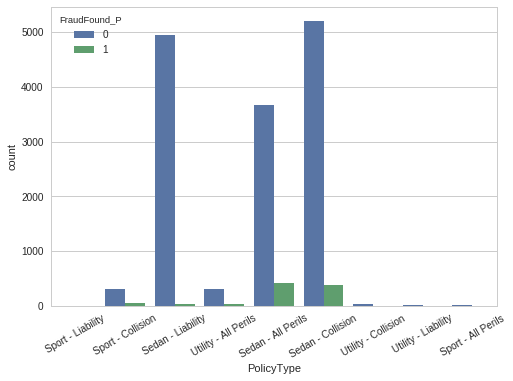

In [576]:
g = sns.countplot(x = "PolicyType", hue = "FraudFound_P", data = data)
for item in g.get_xticklabels():
    item.set_rotation(30)
plt.show()

Types and names of the fields

Set datetimeVariables to do some plots about the fraudulent claims

In [577]:
def convert_to_date(row):
    monthdates = calendar.monthcalendar(row.Year, row.Month + 1)
    day = monthdates[row.WeekOfMonth][row.DayOfWeek]
    if day == 0 and row.WeekOfMonth == 0 :
        day = monthdates[row.WeekOfMonth + 1][row.DayOfWeek]
    elif day == 0 and (row.WeekOfMonth == 4 or row.WeekOfMonth == 3):
        day = monthdates[row.WeekOfMonth - 1][row.DayOfWeek]
    return dt.date(row.Year, row.Month + 1, day)
        
def convert_to_date_claim(row):
    monthdates = calendar.monthcalendar(row.Year, row.MonthClaimed)
    day = monthdates[row.WeekOfMonthClaimed][row.DayOfWeekClaimed]
    if day == 0 and row.WeekOfMonthClaimed == 0 :
        day = monthdates[row.WeekOfMonthClaimed + 1][row.DayOfWeekClaimed]
    elif day == 0 and (row.WeekOfMonthClaimed == 4 or row.WeekOfMonthClaimed == 3):
        day = monthdates[row.WeekOfMonthClaimed - 1][row.DayOfWeekClaimed]
    return dt.date(row.Year, row.MonthClaimed + 1, day)

months_dic = { "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "Jun": 5, "Jul": 6, "Aug": 7, 
            "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11 }
days_dic = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

def convert_to_categorical(df):
    df.Month = df.Month.map(months_dic)
    df.DayOfWeek = df.DayOfWeek.map(days_dic)
    
    df.MonthClaimed = df.MonthClaimed.map(months_dic)
    df.DayOfWeekClaimed = df.DayOfWeekClaimed.map(days_dic)
    return df


In [578]:
# TODO: correct categorical data, with order
# TODO: Testing od the conversion

def transform_the_date(df):
    df.WeekOfMonth = df.WeekOfMonth - 1
    df.WeekOfMonthClaimed = df.WeekOfMonthClaimed -1
    df = convert_to_categorical(df)
    return df

In [579]:
data = transform_the_date(data)

In [580]:
#Getting rid of nans
data = data.dropna()

In [581]:
data.apply(convert_to_date, axis = 1).head()

0    1994-12-28
1    1994-01-12
2    1994-10-28
3    1994-06-11
4    1994-01-24
dtype: object